In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as mplt
import os
import pandas as pd


In [ ]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
od.download("https://www.kaggle.com/datasets/brendan45774/test-file/download?datasetVersionNumber=")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: franckdzoupet
Your Kaggle Key: ··········


100%|██████████| 11.2k/11.2k [00:00<00:00, 8.08MB/s]

In [ ]:
data = pd.read_csv ("/content/test-file/tested.csv")
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


## Analysons les donnees

In [ ]:
print("Taille de notre dataframe: {}\nNom des colonnes: {}\n ".format(data.shape,data.columns))


Taille de notre dataframe: (418, 12)
Nom des colonnes: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
 


Cherchons le nombre de personnes qui ont survecu en fonction de leur sexe, age, de si ils etaient un couple("parch"), et de leur classes

In [ ]:
data_useful = data.drop(['Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
data_useful.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1


<Axes: >

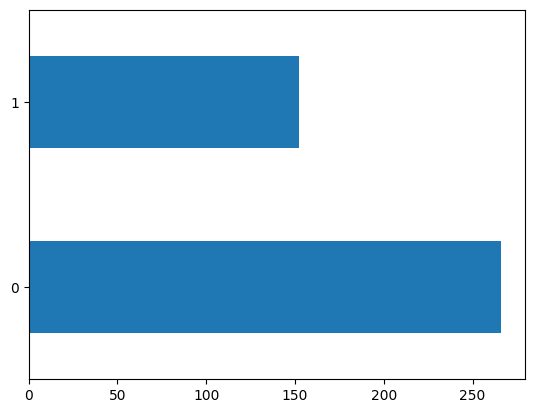

In [ ]:
data_useful.Sex.value_counts().plot(kind = "barh")
data_useful.Survived.value_counts().plot(kind="barh")

In [ ]:
fate_of_men = []
fate_of_women = []

for i in range(len(data_useful["Sex"])):
  if data_useful.Sex[i] == "male":
    fate_of_men.append(data_useful.Survived[i])
  else:
    fate_of_women.append(data_useful.Survived[i])
fate_of_men = pd.Series(fate_of_men)
fate_of_women = pd.Series(fate_of_women)
fate = {"men":fate_of_men, "women":fate_of_women}
# Ici dans fate_of_men et fate_of_woman on va recuperer la valeur "survived" de chq homme et de chq femme

print(fate["men"].value_counts())
print(fate["women"].value_counts())


0    266
dtype: int64
1    152
dtype: int64


In [ ]:
data_useful.groupby('Sex').Survived.sum()

Sex
female    152
male        0
Name: Survived, dtype: int64

<Axes: >

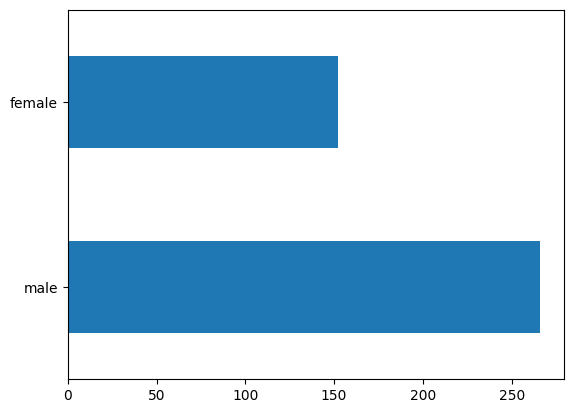

In [ ]:
data_useful.Sex.value_counts().plot(kind='barh')

<Axes: ylabel='Pclass'>

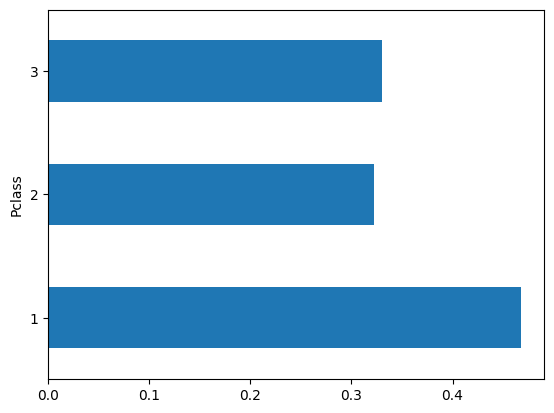

In [ ]:
data_useful.groupby('Pclass').Survived.mean().plot(kind="barh")

In [ ]:
data_useful.Survived.sum()

152

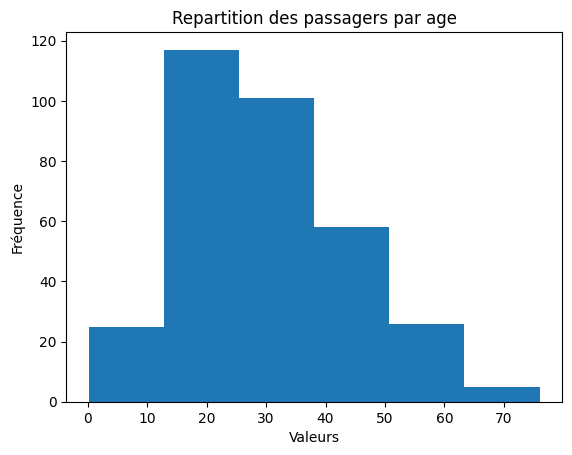

In [ ]:
mplt.hist(data_useful.Age,bins= 6)
mplt.title('Repartition des passagers par age')
mplt.xlabel('Valeurs')
mplt.ylabel('Fréquence')
mplt.show()
#Repartition des passagers par age

Nous allons classer le nombre de survivants par rapport a leur age

In [ ]:
fate = {}#list of variables
for i in [10,20,30,40,50,60,70,80]:
  c=0 #Compte le nombre de personne par tranche d'age
  var = np.where(data_useful.Age<i)# On recupere tout les indices ou l'age est inferieure a i
  var = data_useful.take(var[0])
  var = np.where(var.Age > i-10)#On recupere tout les indices ou l'age est superieure a i-10
  c=len(var[0])
  survived = data_useful.take(var[0]).Survived.sum()#on extrait les donnees correspondantes, puis on fait la somme des "survived"
  #pour trouver le nombre de ceux qui ont survecu
  fate["fate_of_{}".format(i)]=[survived/c]
fate = pd.Series(fate)
print(fate)

# Voyons la moyenne de survie de chaque groupe




fate_of_10                   [0.45]
fate_of_20    [0.46153846153846156]
fate_of_30     [0.4224137931034483]
fate_of_40                   [0.44]
fate_of_50    [0.34146341463414637]
fate_of_60    [0.47058823529411764]
fate_of_70                    [0.5]
fate_of_80                    [0.0]
dtype: object


Nous allons essayer d'entrainer run modele pour predire la survavilbite selon different facteur

Let us import Tensorflow

In [ ]:
import tensorflow as tf

We will replace any Nan values with the mean.

In [ ]:
pd.isna(data_useful).value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch
False        False     False   False  False  False  False  False    332
                                             True   False  False     86
dtype: int64

In [ ]:
#Nous allons remplacer les Nan par la moyenne de la colonne
col = ["Age"]
for i in col:
  for val in data_useful[i]:
    na = pd.isna(data)
  for j in range(len(na[i])):
    if na[i][j] == True:
        data[i][j] = data[i].mean()

<ipython-input-17-d0bdc0bab051>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][j] = data[i].mean()


In [ ]:
print(pd.isna(data).Name.value_counts())

False    418
Name: Name, dtype: int64


Dataset and Trainset

In [ ]:
df = data_useful[:-80]
y_train = df.pop("Survived")
test = data_useful[:80]
y_test = test.pop("Survived")

In [ ]:
print(df.shape)
print(np.where(df.Sex=="male"))
print(y_train.shape)
print(test.shape)
print(y_test.shape)
print(df.describe())

(338, 7)
(array([  0,   2,   3,   5,   7,   9,  10,  11,  13,  16,  17,  20,  21,
        23,  25,  27,  28,  29,  30,  31,  34,  35,  38,  39,  40,  41,
        42,  45,  46,  47,  50,  51,  54,  55,  56,  57,  58,  60,  61,
        62,  64,  67,  68,  71,  73,  75,  76,  78,  80,  81,  82,  83,
        84,  85,  89,  91,  93,  94,  95,  97,  99, 101, 102, 103, 105,
       106, 107, 108, 109, 110, 115, 116, 118, 121, 123, 124, 126, 128,
       129, 130, 131, 133, 134, 135, 136, 137, 139, 142, 143, 144, 145,
       146, 147, 148, 149, 151, 152, 154, 155, 158, 161, 163, 164, 166,
       167, 170, 171, 172, 173, 174, 177, 180, 181, 183, 185, 187, 189,
       190, 191, 192, 193, 194, 195, 196, 198, 201, 202, 204, 205, 207,
       209, 210, 211, 212, 215, 217, 219, 221, 223, 226, 228, 229, 230,
       232, 233, 234, 235, 236, 237, 242, 243, 244, 245, 247, 251, 252,
       253, 254, 255, 256, 257, 259, 260, 261, 264, 265, 266, 267, 269,
       270, 271, 274, 276, 277, 278, 279, 281, 285, 28

In [ ]:
CATEGORICAL_COLUMNS = ['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch']
NUMERIC_COLUMNS = ['Age']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = df[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='PassengerId', vocabulary_list=(892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(df, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(test, y_test, num_epochs=12)
# Number of epoch(Total) = number_of_data*number_of_epoch(in the function)/ batch_size

Create the model

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


In [ ]:
#linear_est.train(train_input_fn)  # train
#result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

#clear_output()  # clears consoke output
#print(result['accuracy'])  # the result variable is simply a dict of stats about our model

###By using Keras


####Nous ne prendrons en compte que le sexe

####We first create our tensor


In [ ]:
#On numerise d'abord la colonne Sex
for i in range(len(df["Sex"])):
  if df["Sex"][i] == "male":
    df["Sex"][i] = 0.0
  elif df["Sex"][i] == "female":
    df["Sex"][i] = 1.0
print(df.Sex[:5])

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Sex, dtype: object


<ipython-input-25-4cf3cb4d1c14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"][i] = 0.0
<ipython-input-25-4cf3cb4d1c14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"][i] = 1.0


In [ ]:
x = tf.constant(df.Sex, dtype = tf.float64)
x = tf.reshape(x, shape=(-1,1))
y = tf.constant(y_train)
y = tf.reshape(y, shape=(-1,1))
print(x.shape,y.shape)
print(x.ndim,y.shape)

(338, 1) (338, 1)
2 (338, 1)


model

In [ ]:
tf.random.set_seed(40)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])#mae is for mean absolute error

#fit the model
model.fit(x,y, epochs=20)

Epoch 1/20
11/11 [==============================] - 1s 3ms/step - loss: 0.4099 - mae: 0.4099
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3605 - mae: 0.3605
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3154 - mae: 0.3154
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2688 - mae: 0.2688
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.2278 - mae: 0.2278
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1927 - mae: 0.1927
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.1573 - mae: 0.1573
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.1180 - mae: 0.1180
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0742 - mae: 0.0742
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.0265 - mae: 0.0265
Epoch 11/20
11/11 [==============================] - 0s 2ms/step - lo

In [ ]:
weight = model.get_weights()


In [ ]:
from tensorflow.keras.utils import plot_model

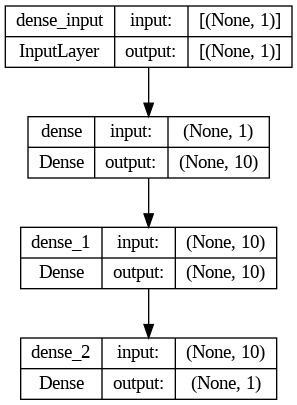

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
for i in range(len(test["Sex"])):
  if test["Sex"][i] == "male":
    test["Sex"][i] = 0.0
  elif test["Sex"][i] == "female":
    test["Sex"][i] = 1.0
print(test.Sex[:5])

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Sex, dtype: object


In [ ]:
x_t = tf.constant(test.Sex, dtype=tf.float64)
y_t = tf.constant(y_test)
x_t = tf.reshape(x_t, (-1, 1))
y_t = tf.reshape(y_t, (-1, 1))


In [ ]:
model.evaluate(x_t, y_t)
y_pred = model.predict(x_t)
y_pred =y_pred.reshape([80,])
print(pd.DataFrame([test.Sex, y_test]))
print(pd.DataFrame([test.Sex, y_pred]))

3/3 [==============================] - 0s 2ms/step
           0    1    2    3    4    5    6    7    8    9   ...   70   71  \
Sex       0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  0.0   
Survived  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  0.0   

           72   73   74   75   76   77   78   79  
Sex       1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  
Survived  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  

[2 rows x 80 columns]
                 0         1         2         3         4         5   \
Sex        0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
Unnamed 0 -0.009722  0.997681 -0.009722 -0.009722  0.997681 -0.009722   

                 6         7         8         9   ...        70        71  \
Sex        1.000000  0.000000  1.000000  0.000000  ...  1.000000  0.000000   
Unnamed 0  0.997681 -0.009722  0.997681 -0.009722  ...  0.997681 -0.009722   

                 72        73        74        75        76        77  \
Sex        1.

##Cette fois ci , nous allons refaire la meme chose mais en prenant en compte tout les parametres

In [ ]:
df = data_useful.copy()

In [ ]:
"""#We numerise our data

#Sex column
for i in range(len(df["Sex"])):
  if df.loc[i,"Sex"] == "male":
      df.loc[i,"Sex"] = 0.0
  elif df.loc[i,"Sex"] == "female":
    df.loc[i,"Sex"] = 1.0


dt = np.array(df.Sex.to_numpy()).reshape([418,1])"""


'#We numerise our data\n\n#Sex column\nfor i in range(len(df["Sex"])):\n  if df.loc[i,"Sex"] == "male":\n      df.loc[i,"Sex"] = 0.0\n  elif df.loc[i,"Sex"] == "female":\n    df.loc[i,"Sex"] = 1.0\n\n\ndt = np.array(df.Sex.to_numpy()).reshape([418,1])'

In [ ]:
df.Parch = df.Parch.astype(float)
dt = np.array(df.Parch.to_numpy().reshape([418,1]))


In [ ]:
df.Pclass = df.Pclass.astype(float)
dt = np.concatenate((dt,df.Pclass.to_numpy().reshape([418,1])), axis=1)


we deal with the nan in Age

In [ ]:
print(df.Age.isna())


0      False
1      False
2      False
3      False
4      False
       ...  
413     True
414    False
415    False
416     True
417     True
Name: Age, Length: 418, dtype: bool


In [ ]:
#Nous allons remplacer les Nan par la moyenne de la colonne
for j in range(len(df.Age)):
  if df.Age.isna()[j] == True:
    df.Age[j] = df.Age.mean()

<ipython-input-39-8b53f76f9953>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[j] = df.Age.mean()


In [ ]:
from pandas._libs.lib import is_float
for i in range(len(df.Sex)):
  if is_float(df.Age[i]) == False:
    print(i)

In [ ]:
dt = np.concatenate((dt,df.Age.to_numpy().reshape([418,1])), axis=1)
print(dt)

[[ 0.          3.         34.5       ]
 [ 0.          3.         47.        ]
 [ 0.          2.         62.        ]
 ...
 [ 0.          3.         38.5       ]
 [ 0.          3.         30.27259036]
 [ 1.          3.         30.27259036]]


In [ ]:
print(df.shape)

(418, 8)


We create our tensor


In [ ]:
surv = df.pop("Survived")

In [ ]:
y_t = surv[-80:]
x_t = dt[-80:]
print(y_t.shape, x_t)

(80,) [[ 0.          2.         25.        ]
 [ 0.          3.         30.27259036]
 [ 0.          2.         18.        ]
 [ 0.          3.         32.        ]
 [ 9.          3.         30.27259036]
 [ 1.          1.         58.        ]
 [ 1.          3.         30.27259036]
 [ 0.          3.         16.        ]
 [ 0.          2.         26.        ]
 [ 0.          3.         38.        ]
 [ 0.          2.         24.        ]
 [ 0.          2.         31.        ]
 [ 1.          1.         45.        ]
 [ 0.          2.         25.        ]
 [ 0.          2.         18.        ]
 [ 2.          2.         49.        ]
 [ 2.          3.          0.17      ]
 [ 0.          1.         50.        ]
 [ 0.          1.         59.        ]
 [ 0.          3.         30.27259036]
 [ 0.          3.         30.27259036]
 [ 0.          3.         30.        ]
 [ 2.          3.         14.5       ]
 [ 1.          2.         24.        ]
 [ 0.          2.         31.        ]
 [ 0.          3.  

In [ ]:

x = tf.constant( dt[:338],
                 dtype = tf.float64)
print(dt.shape)
x = tf.reshape(x, shape=(-1,1,3))
y = tf.constant(y_train)
y = tf.reshape(y, shape=(-1,1,1))


(418, 3)


In [ ]:
print(x)
print(x.shape,y.shape)

tf.Tensor(
[[[ 0.   3.  34.5]]

 [[ 0.   3.  47. ]]

 [[ 0.   2.  62. ]]

 ...

 [[ 0.   1.  30. ]]

 [[ 0.   2.  32. ]]

 [[ 2.   3.  39. ]]], shape=(338, 1, 3), dtype=float64)
(338, 1, 3) (338, 1, 1)


We create the model

In [ ]:
tf.random.set_seed(41)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
])

#Compile the model
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["mae"])

model2.fit(x,y, epochs=200)


Epoch 1/200
11/11 [==============================] - 1s 5ms/step - loss: 0.3949 - mae: 0.3949
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3867 - mae: 0.3867
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3821 - mae: 0.3821
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3837 - mae: 0.3837
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3746 - mae: 0.3746
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3620 - mae: 0.3620
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3558 - mae: 0.3558
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 0.3559 - mae: 0.3559
Epoch 9/200
11/11 [==============================] - 0s 3ms/step - loss: 0.3557 - mae: 0.3557
Epoch 10/200
11/11 [==============================] - 0s 3ms/step - loss: 0.3551 - mae: 0.3551
Epoch 11/200
11/11 [==============================] - 0s 2m

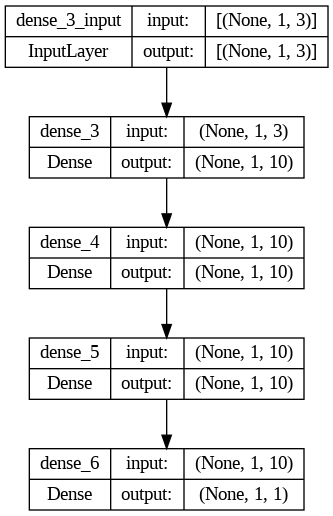

In [ ]:
plot_model(model2, show_shapes=True)

In [ ]:
x_t = tf.constant(x_t,dtype=tf.float64)
y_t = tf.constant(y_t,dtype=tf.float64)

In [ ]:
x_t = tf.reshape(x_t, shape=(-1,1,3))
y_t = tf.reshape(y_t, shape=(-1,1,1))
print(x_t.shape,y_t.shape)

(80, 1, 3) (80, 1, 1)


In [ ]:
model2.evaluate(x_t, y_t)
y_pred = model2.predict(x_t)
y_pred.reshape([-1,])
print(y_pred.shape)

print(pd.DataFrame(surv[:10]))
print("----------------------------------------------------------------------")
print(y_pred[:10,0,0])

3/3 [==============================] - 0s 3ms/step
(80, 1, 1)
   Survived
0         0
1         1
2         0
3         0
4         1
5         0
6         1
7         0
8         1
9         0
----------------------------------------------------------------------
[ 5.1483512e-04  5.1483512e-04  5.1483512e-04  5.1483512e-04
 -8.7976438e-01  5.1483512e-04  4.7606179e-01  1.3887323e-01
  5.1483512e-04  5.1483512e-04]


##Saving our model

#####Saving our model allows us to use them outside of Google collabs.
#####There are two mains formats: The fdf5 and the Savemodel format

In [ ]:
model2.save("best_model_save_format")

In [ ]:
#Using the hdf5 format
model2.save("best_model_save_hdf5_format")

In [ ]:
#Load a save model format
loaded_model = tf.keras.models.load_model("best_model_save_hdf5_format")
loaded_model.summary()
'sometimes you might have to squezze your model with loaded_model.squezze '

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1, 10)             40        
                                                                 
 dense_4 (Dense)             (None, 1, 10)             110       
                                                                 
 dense_5 (Dense)             (None, 1, 10)             110       
                                                                 
 dense_6 (Dense)             (None, 1, 1)              11        
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


'sometimes you might have to squezze your model with loaded_model.squezze '

In [ ]:
#download from google collabs:
from google.colab import files

files.download("/content/best_model_save_hdf5_format")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>